# 计算新闻传播学 HOMEWORK6
***
## 王凯伦  15210130081

# 主题模型

In [1]:
%matplotlib inline
from __future__ import print_function
from wordcloud import WordCloud
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data
corpus = corpora.BleiCorpus('C:/Program Files/cjc2016/data/ap/ap.dat', 'C:/Program Files/cjc2016/data/ap/vocab.txt')

In [3]:
' '.join(dir(corpus))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __iter__ __len__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _load_specials _save_specials _smart_save docbyoffset fname id2word index length line2doc load save save_corpus serialize'

In [4]:
corpus.id2word.items()[:3]

[(0, u'i'), (1, u'new'), (2, u'percent')]

# Build the topic model

In [5]:
NUM_TOPICS = 100

In [6]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

In [7]:
' '.join(dir(model))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _apply _load_specials _save_specials _smart_save alpha bound chunksize clear decay dispatcher distributed do_estep do_mstep eta eval_every expElogbeta gamma_threshold get_document_topics get_topic_terms id2word inference init_dir_prior iterations load log_perplexity minimum_probability num_terms num_topics num_updates numworkers offset optimize_alpha optimize_eta passes print_topic print_topics save show_topic show_topics state sync_state top_topics update update_alpha update_eta update_every'

# We can see the list of topics a document refers to

In [8]:
document_topics = [model[c] for c in corpus]

In [9]:
# how many topics does one document cover?
document_topics[2]

[(13, 0.028530306070852746),
 (14, 0.038402871836708007),
 (17, 0.050302648846314746),
 (19, 0.12935771910837265),
 (20, 0.040819944608969039),
 (29, 0.025388298542503455),
 (35, 0.13029850361928402),
 (46, 0.15897599304316998),
 (58, 0.021012248550576946),
 (62, 0.074190375916737203),
 (75, 0.014361743505640255),
 (76, 0.18166160503447601),
 (77, 0.025308899755219241),
 (80, 0.014560680612331353),
 (95, 0.031463664740308116)]

In [10]:
# The first topic
# format: weight, term
model.show_topic(0, 10)

[(u'i', 0.010900749881538547),
 (u'bridal', 0.0090631002413068904),
 (u'dresses', 0.0083620042208751889),
 (u'imperial', 0.0074128979954704629),
 (u'champion', 0.0072746741327563919),
 (u'genes', 0.006888282572708869),
 (u'emperor', 0.0047478633166159155),
 (u'harvard', 0.0044976529342526895),
 (u'abortion', 0.0044786920915586862),
 (u'committee', 0.0044670760590915168)]

In [11]:
# The 100 topic
# format: weight, term
model.show_topic(99, 10)

[(u'benson', 0.015291696986857317),
 (u'east', 0.013325319219498295),
 (u'million', 0.012211573357027664),
 (u'west', 0.0088067998910780713),
 (u'committees', 0.008709671697254338),
 (u'germany', 0.0086056739555927849),
 (u'percent', 0.0071558501869785429),
 (u'german', 0.0070053919763992589),
 (u'cordon', 0.0065582617413933618),
 (u'year', 0.0065390560553029156)]

In [12]:
words = model.show_topic(0, 5)
words

[(u'i', 0.010900749881538547),
 (u'bridal', 0.0090631002413068904),
 (u'dresses', 0.0083620042208751889),
 (u'imperial', 0.0074128979954704629),
 (u'champion', 0.0072746741327563919)]

In [13]:
model.show_topics(4)

[(35,
  u'0.010*i + 0.009*south + 0.008*defense + 0.006*state + 0.006*million + 0.005*government + 0.005*information + 0.005*years + 0.004*officials + 0.004*people'),
 (45,
  u'0.036*hudson + 0.012*biden + 0.011*slaying + 0.009*seconddegree + 0.008*i + 0.007*committee + 0.007*kahn + 0.006*bridges + 0.006*educated + 0.006*murder'),
 (53,
  u'0.022*biography + 0.013*permission + 0.010*book + 0.009*infant + 0.009*context + 0.009*jews + 0.008*examiner + 0.008*reluctant + 0.008*jewish + 0.008*unsuccessful'),
 (2,
  u'0.015*market + 0.013*rates + 0.011*stock + 0.009*prices + 0.008*interest + 0.008*new + 0.008*index + 0.008*markets + 0.007*average + 0.006*dropped')]

In [14]:
for f, w in words[:10]:
    print(f, w)

i 0.0109007498815
bridal 0.00906310024131
dresses 0.00836200422088
imperial 0.00741289799547
champion 0.00727467413276


In [15]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(w for f, w in words)
    with open('C:/Program Files/cjc2016/data/topics_term_weight.txt', 'a') as output:
        for f, w in words:
            line = str(ti) + '\t' +  f+ '\t' + str(w/tf) 
            output.write(line + '\n')

In [16]:
# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [22]:
# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)
words = np.array(words).T
words_freq=[float(i)*10000000 for i in words[1]]
words = zip(words[0], words_freq)

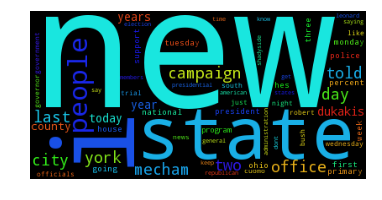

In [24]:
wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

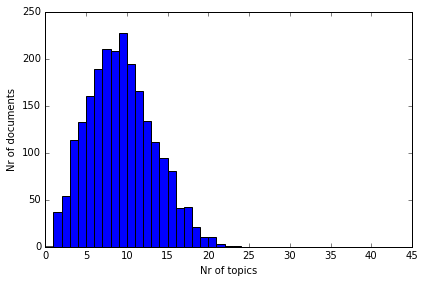

In [25]:
num_topics_used = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

In [27]:
# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play around with this parameter
ALPHA = 1.0
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

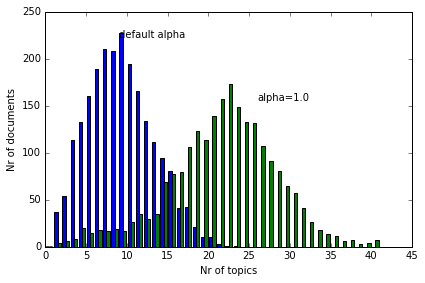

In [28]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
# The coordinates below were fit by trial and error to look good
plt.text(9, 223, r'default alpha')
plt.text(26, 156, 'alpha=1.0')
fig.tight_layout()

***
# Topic Modeling Using Graphlab

In [29]:
import graphlab
graphlab.canvas.set_target("ipynb")

In [30]:
sf = graphlab.SFrame.read_csv("E:/WODE/M Homework/cjc2016/data/w15.txt", header=False)

This non-commercial license of GraphLab Create is assigned to 15210130081@fudan.edu.cn and will expire on May 13, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-05-29 23:14:23,772 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\ADMINI~1\AppData\Local\Temp\graphlab_server_1464534855.log.0


Finished parsing file E:\WODE\M Homework\cjc2016\data\w15.txt

Parsing completed. Parsed 100 lines in 2.30313 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 12278 lines. Lines per second: 6575.95

Finished parsing file E:\WODE\M Homework\cjc2016\data\w15.txt

Parsing completed. Parsed 72269 lines in 3.73821 secs.

In [31]:
sf

X1
aynrand born and educatedin russia rand migrated ...
asphalt in americanenglish asphalt or ...
actinopterygii theactinopterygii consti ...
altaiclanguages theselanguage families share ...
argon the name argon isderived from the greek ...
augustderleth a 1938guggenheim fellow der ...
amateur amateurism can beseen in both a negative ...
assemblyline an assemblyline is a manufacturing ...
astronomicalunit anastronomical unit ...
abbess an abbess latinabbatissa feminine form ...


## Transformations

In [32]:
'  '.join(dir(sf['X1']))

'_SArray__check_min_observations  _SArray__construct_ctr  __abs__  __add__  __and__  __class__  __contains__  __delattr__  __div__  __doc__  __eq__  __floordiv__  __format__  __ge__  __get_content_identifier__  __getattribute__  __getitem__  __gt__  __has_size__  __hash__  __init__  __is_materialized__  __iter__  __le__  __len__  __lt__  __materialize__  __mod__  __module__  __mul__  __ne__  __neg__  __new__  __nonzero__  __or__  __pos__  __pow__  __proxy__  __radd__  __rdiv__  __reduce__  __reduce_ex__  __repr__  __rfloordiv__  __rmod__  __rmul__  __rpow__  __rsub__  __rtruediv__  __setattr__  __sizeof__  __slots__  __str__  __sub__  __subclasshook__  __truediv__  _count_ngrams  _count_words  _getitem_cache  _save_as_text  all  any  append  apply  argmax  argmin  astype  clip  clip_lower  clip_upper  contains  cumulative_max  cumulative_mean  cumulative_min  cumulative_std  cumulative_sum  cumulative_var  date_range  datetime_to_str  dict_has_all_keys  dict_has_any_keys  dict_keys  di

In [33]:
bow = sf['X1']._count_words()

In [34]:
type(sf['X1'])

graphlab.data_structures.sarray.SArray

In [35]:
type(bow)

graphlab.data_structures.sarray.SArray

In [37]:
bow.dict_has_any_keys(['limited'])

dtype: int
Rows: 72269
[1L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 1L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 1L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, ... ]

In [38]:
sf['X1'][0]

'aynrand born and educated in russia rand migrated to the united states in 1926  she worked as a screenwriter in hollywood and had a play produced on broadway in 19351936  she first achieved fame with her 1943 novel the fountainhead over a decade later she published her magnum opus the philosophical novel atlas shrugged in 1957 rands political views reflected in both her fiction and her theoretical work emphasize individual rights including property rights and laissezfaire capitalism enforced by a constitutionally limited government she was a fierce opponent of all forms of collectivism and statism including fascism communism socialism and the welfare state and promoted ethical egoism while rejecting the ethic of altruism she considered reason to be the only means of acquiring knowledge and its advocacy the most important aspect of her philosophy stating i am not primarily an advocate of capitalism but of egoism and i am not primarily an advocate of egoism but of reason if one recogniz

In [39]:
bow.dict_keys()[0][:20]

['austin',
 'academia',
 'mccaskey',
 'known',
 'founded',
 'kelley',
 'widest',
 'principles',
 '1985',
 'community',
 'forecasting',
 'laugh',
 'chronicle',
 'generation',
 'intellectually',
 '2001',
 'entry',
 'encyclopedia',
 'ignored',
 'press']

In [40]:
bow.dict_values()[0][:20]

[1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 1L,
 2L,
 1L,
 1L,
 1L,
 1L]

In [41]:
sf['bow'] = bow

In [42]:
type(sf['bow'])

graphlab.data_structures.sarray.SArray

In [43]:
len(sf['bow'])

72269

In [44]:
sf['bow'][0].items()[:5]

[('limited', 3L),
 ('writings', 2L),
 ('child', 1L),
 ('four', 1L),
 ('controversial', 1L)]

In [45]:
sf['tfidf'] = graphlab.text_analytics.tf_idf(sf['X1'])

In [46]:
sf['tfidf'][0].items()[:5]

[('limited', 10.04705669672047),
 ('writings', 9.76010421134325),
 ('child', 3.5947763540598654),
 ('four', 2.1272386886969024),
 ('controversial', 4.375805453003677)]

In [47]:
sf.show()

In [48]:
sf

X1,bow,tfidf
aynrand born and educatedin russia rand migrated ...,"{'limited': 3L,'writings': 2L, 'child': ...","{'limited':10.04705669672047, ..."
asphalt in americanenglish asphalt or ...,"{'all': 1L, 'accadian':1L, 'similarity': 1L, ...","{'all':1.3891905239989626, ..."
actinopterygii theactinopterygii consti ...,"{'represent': 3L, 'all':1L, 'evolutionary': 2L, ...","{'represent':12.372739757127263, ..."
altaiclanguages theselanguage families share ...,"{'sergei': 3L, 'all': 6L,'todays': 1L, 'chinese': ...","{'sergei':20.031873121992916, ..."
argon the name argon isderived from the greek ...,"{'limited': 1L,'embolism': 1L, ...","{'limited':3.3490188989068232, ..."
augustderleth a 1938guggenheim fellow der ...,"{'haycraft': 1L, 'since':2L, 'impression': 1L, ...","{'haycraft':10.089538258513047, ..."
amateur amateurism can beseen in both a negative ...,"{'since': 1L, 'among':1L, 'lack': 2L, ...","{'since':1.8775124538896095, ..."
assemblyline an assemblyline is a manufacturing ...,"{'all': 3L, 'concept':6L, 'consider': 1L, ...","{'all':4.167571571996888, ..."
astronomicalunit anastronomical unit ...,"{'precise': 1L, 'all':2L, 'chinese': 1L, ...","{'precise':5.491057060675752, 'a ..."
abbess an abbess latinabbatissa feminine form ...,"{'kildares': 1L, 'birth':1L, 'founder': 1L, ...","{'kildares':11.188150547181156, ..."


# Text cleaning

In [49]:
docs = sf['bow'].dict_trim_by_values(2)

In [50]:
docs = docs.dict_trim_by_keys( graphlab.text_analytics.stopwords(),  exclude=True )

# Topic modeling

In [51]:
m = graphlab.topic_model.create(docs)

Learning a topic model

Number of documents     72269

Vocabulary size    171005

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 6.79s         | 3.50412e+006   | 0               |

+-----------+---------------+----------------+-----------------+

In [52]:
m

Class                         : TopicModel

Schema
------
Vocabulary Size               : 171005

Settings
--------
Number of Topics              : 10
alpha                         : 5.0
beta                          : 0.1
Iterations                    : 10
Training time                 : 7.8284
Verbose                       : False

Accessible fields             : 
m['topics']                   : An SFrame containing the topics.
m['vocabulary']               : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.

In [54]:
m.get_topics()

topic,word,score
0,school,0.0374967778644
0,years,0.0245030583346
0,age,0.0200511231136
0,year,0.0168889042153
0,music,0.0152957252283
1,war,0.0188831770032
1,de,0.0126649694161
1,work,0.0120478304017
1,song,0.0101339901016
1,company,0.00917068575493


In [63]:
topics = m.get_topics().unstack(['word','score'], new_column_name='topic_words')['topic_words'].apply(lambda x: x.keys())


In [68]:
topics

dtype: list
Rows: 10
[['album', 'club', 'university', 'family', 'county'], ['town', 'house', 'time', 'united', 'president'], ['age', 'years', 'music', 'school', 'year'], ['large', '18', 'american', 'population', 'league'], ['series', 'released', 'team', 'film', 'season'], ['city', 'government', 'river', 'south', 'area'], ['work', 'company', 'de', 'war', 'song'], ['published', 'aircraft', 'church', 'set', 'air'], ['won', 'game', 'made', 'national', 'number'], ['states', 'band', 'line', 'north', 'system']]

In [73]:
for topic in topics:
    print (topic)

['album', 'club', 'university', 'family', 'county']
['town', 'house', 'time', 'united', 'president']
['age', 'years', 'music', 'school', 'year']
['large', '18', 'american', 'population', 'league']
['series', 'released', 'team', 'film', 'season']
['city', 'government', 'river', 'south', 'area']
['work', 'company', 'de', 'war', 'song']
['published', 'aircraft', 'church', 'set', 'air']
['won', 'game', 'made', 'national', 'number']
['states', 'band', 'line', 'north', 'system']


In [74]:
pred = m.predict(docs)

In [75]:
pred.show()

In [76]:
pred = m.predict(docs, output_type='probabilities')

In [77]:
m['vocabulary']

dtype: str
Rows: 171005
['2001', 'journal', 'matthew', 'historian', 'increased', 'crisis', 'financial', '1987', 'reagan', 'traditional', 'percent', 'received', 'research', 'designed', 'questions', 'house', 'articles', '1964', 'delivering', 'activity', 'prescribed', 'schools', 'rejected', 'capitalism', 'romantic', 'isabel', 'writer', 'company', 'developed', 'publication', 'subject', 'expressed', 'differences', 'mises', 'journalist', 'lives', 'popular', 'public', 'republican', 'presidential', 'january', 'positions', 'psychology', 'acknowledged', 'activism', 'world', 'union', 'nonfiction', '1938', 'anthem', 'referred', 'occasion', '1960s', 'production', 'antifascist', 'surname', 'century', 'learned', 'masterful', 'knowledge', 'randian', 'version', 'began', 'future', 'anticommunist', 'hickman', 'important', 'screenplay', 'lifetime', 'held', 'admiration', 'notes', 'form', 'bobbsmerrill', 'society', 'man', 'picture', 'william', 'exist', 'based', 'hero', 'street', 'number', 'machine', 'permis

In [78]:
m['topics']

topic_probabilities,vocabulary
"[1.72421968283e-07,7.23542292819e-06, ...",2001
"[1.72421968283e-07,0.000184574220188, ...",journal
"[1.72421968283e-07,1.41871037808e-07, ...",matthew
"[1.72421968283e-07,1.41871037808e-07, ...",historian
"[1.72421968283e-07,0.00109680499329, ...",increased
"[5.18990124531e-05,0.000761989344065, ...",crisis
"[1.72421968283e-07,1.41871037808e-07, ...",financial
"[0.000486402372525,3.70283408678e-05, ...",1987
"[1.72421968283e-07,1.41871037808e-07, ...",reagan
"[0.00041570936553,0.00157916652184, ...",traditional


In [79]:
m.get_topics()

topic,word,score
0,school,0.0374967778644
0,years,0.0245030583346
0,age,0.0200511231136
0,year,0.0168889042153
0,music,0.0152957252283
1,war,0.0188831770032
1,de,0.0126649694161
1,work,0.0120478304017
1,song,0.0101339901016
1,company,0.00917068575493


In [81]:
def print_topics(m):
    topics = m.get_topics(num_words=5)
    topics = topics.unstack(['word','score'], new_column_name='topic_words')['topic_words']
    topics = topics.apply(lambda x: x.keys())
    for topic in topics:
        print (topic)
print_topics(m)

['album', 'club', 'university', 'family', 'county']
['town', 'house', 'time', 'united', 'president']
['age', 'years', 'music', 'school', 'year']
['large', '18', 'american', 'population', 'league']
['series', 'released', 'team', 'film', 'season']
['city', 'government', 'river', 'south', 'area']
['work', 'company', 'de', 'war', 'song']
['published', 'aircraft', 'church', 'set', 'air']
['won', 'game', 'made', 'national', 'number']
['states', 'band', 'line', 'north', 'system']


##  Initializing from other models

In [82]:
m2 = graphlab.topic_model.create(docs,
                                 num_topics=10,
                                 initial_topics=m['topics'])

Initializing from provided topics and vocabulary.

Learning a topic model

Number of documents     72269

Vocabulary size    171005

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 7.00s         | 3.52936e+006   | 0               |

+-----------+---------------+----------------+-----------------+

## Seeding the model with prior knowledge

In [83]:
associations = graphlab.SFrame()
associations['word'] = ['recognition']
associations['topic'] = [0]

In [84]:
m2 = graphlab.topic_model.create(docs,
                                 num_topics=20,
                                 num_iterations=50,
                                 associations=associations, 
                                 verbose=False)

Learning a topic model

Number of documents     72269

Vocabulary size    171005

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 7.15s         | 2.61258e+006   | 0               |

| 20        | 13.32s        | 2.90416e+006   | 0               |

| 30        | 19.46s        | 3.3475e+006    | 0               |

| 40        | 25.55s        | 3.49748e+006   | 0               |

| 50        | 31.61s        | 3.21515e+006   | 0               |

+-----------+---------------+----------------+-----------------+

In [85]:
m2.get_topics(num_words=10)

topic,word,score
0,theory,0.00758559250917
0,study,0.00558330762987
0,group,0.00517664736179
0,human,0.00498365604812
0,form,0.00497331722774
0,social,0.00458733460041
0,found,0.00450807031087
0,studies,0.00446326875591
0,published,0.00436332682562
0,children,0.00421858334037


In [86]:
print_topics(m2)

['park', 'city', 'station', 'north', 'road']
['states', 'international', 'national', 'public', 'state']
['town', '18', 'age', 'years', 'population']
['years', 'band', 'made', 'time', 'played']
['series', 'episode', 'back', 'film', 'show']
['house', 'life', 'work', 'father', 'son']
['study', 'group', 'human', 'form', 'theory']
['book', 'number', 'called', 'language', 'made']
['german', 'king', 'war', 'french', 'century']
['party', 'president', 'court', 'state', 'government']
['work', 'life', 'time', 'art', 'church']
['league', 'game', 'team', 'games', 'season']
['development', 'information', 'company', 'data', 'system']
['high', 'students', 'school', 'college', 'university']
['engine', 'space', 'design', 'power', 'air']
['album', 'radio', 'song', 'music', 'released']
['company', 'de', 'london', 'railway', 'la']
['battle', 'force', 'war', 'forces', 'army']
['states', 'country', 'world', 'south', 'government']
['water', 'island', 'river', 'lake', 'species']
